# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


In [62]:
#import libraries and packages necessary for this project
import pandas as pd
import numpy as np
import requests as rq
import tweepy as tw
import json as js
import seaborn as sns
from tweepy import OAuthHandler
from timeit import default_timer
import matplotlib.pyplot as plt
%matplotlib inline

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
Twitter_archive_df = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)

# Save HTML to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [4]:
image_predictions_df = pd.read_csv("image_predictions.tsv",sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:

consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_secret = access_secret

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth)


'\nconsumer_key = consumer_key\nconsumer_secret = consumer_secret\naccess_token = access_token\naccess_secret = access_secret\n\nauth = tw.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tw.API(auth)\n'

In [6]:

tweet_ids = Twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            js.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


'\ntweet_ids = Twitter_archive_df.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            js.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tw.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

> time for the query 6985.1096022

In [7]:
#Extracting twitter id, favorite_count,retweet count from the txt file
file1 = open('tweet_json.txt', 'r')
Lines = file1.readlines()
count = 0
i_d = []
like = []
retweet = []

for line in Lines:
    count += 1
    res = js.loads(line)
    i_d.append(res['id'])
    like.append(res['favorite_count'])
    retweet.append(res['retweet_count'])
    

In [8]:
#Converting the extracted twitter id, favorite_count,retweet count to dataframe
additional_df = pd.DataFrame( {'tweet_id': i_d,
     'Favorite_count': like,
     'Retweet_count': retweet
    })

## Assessing Data

##### Visual assessment

In [9]:
Twitter_archive_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1965,673345638550134785,NaN,NaN,2015-12-06 03:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He's a fluffy lil yellow pup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673345638...,7,10,Gerald,None,None,None,None
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,10,10,a,None,None,None,None
143,864197398364647424,NaN,NaN,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paisley. She ate a flower just to prov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864197398...,13,10,Paisley,None,None,None,None
1939,673887867907739649,NaN,NaN,2015-12-07 15:32:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a great time sleeping and y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673887867...,10,10,None,None,None,None,None
710,784826020293709826,NaN,NaN,2016-10-08 18:41:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He's going D1 for sure. Insane ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784826020...,13,10,Rusty,None,None,None,None
1539,689661964914655233,NaN,NaN,2016-01-20 04:13:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Luca. He's a Butternut Scooperfloof. Glor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689661964...,12,10,Luca,None,None,None,None
1010,747461612269887489,NaN,NaN,2016-06-27 16:08:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen a shark hold another shark like thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747461612...,10,10,None,None,None,None,None
995,748346686624440324,NaN,NaN,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686...,10,10,None,None,None,None,None
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She's a Bimmington Fettuccini. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668986018...,9,10,Ruby,None,None,None,None
148,863427515083354112,8.634256e+17,77596200.0,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [10]:
image_predictions_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
197,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,Maltese_dog,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True
966,706291001778950144,https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg,1,Border_terrier,0.587101,True,bull_mastiff,0.164087,True,Staffordshire_bullterrier,0.105011,True
693,684225744407494656,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True
459,674790488185167872,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,Labrador_retriever,0.801903,True,Chesapeake_Bay_retriever,0.193575,True,Rottweiler,0.001193,True
898,699779630832685056,https://pbs.twimg.com/media/CbYd3C9WEAErJ4Z.jpg,1,malinois,0.706038,True,German_shepherd,0.165655,True,Great_Dane,0.059048,True
853,696405997980676096,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,1,borzoi,0.132845,True,Walker_hound,0.086005,True,Great_Pyrenees,0.065582,True
1132,728387165835677696,https://pbs.twimg.com/media/ChvAQuMWMAAVaKD.jpg,1,collie,0.266414,True,Great_Pyrenees,0.138546,True,keeshond,0.109014,True
148,668633411083464705,https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg,1,Pekinese,0.589011,True,Shih-Tzu,0.390987,True,Japanese_spaniel,0.003310,True
1675,813157409116065792,https://pbs.twimg.com/media/C0jqVVOXUAAGJ0G.jpg,2,Siamese_cat,0.843911,False,Pembroke,0.070567,True,Cardigan,0.041916,True
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True


In [11]:
additional_df.sample(20)

,tweet_id,Favorite_count,Retweet_count
204,847617282490613760,6536,379
710,775729183532220416,12364,4319
1868,672523490734551040,556,147
1681,676819651066732545,1667,603
499,804413760345620481,0,3033
1735,675354435921575936,29663,14993
1668,677228873407442944,3237,1479
620,788552643979468800,0,6718
2024,669603084620980224,859,317
1653,677673981332312066,3052,1361


###### programmatic assessement 

In [12]:
len(Twitter_archive_df),len(image_predictions_df),len(additional_df)

(2356, 2075, 2225)

In [13]:
Twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2225 non-null   int64
 1   Favorite_count  2225 non-null   int64
 2   Retweet_count   2225 non-null   int64
dtypes: int64(3)
memory usage: 52.3 KB


In [16]:
Twitter_archive_df.duplicated().sum()

0

In [17]:
image_predictions_df.duplicated().sum()

0

In [18]:
additional_df.duplicated().sum()

0

### Quality issues
1. Name column in Twitter_archive_df dataframe contains some invalid records example "a"

2. Columns with high amount of null in Twitter_archive_df dataframe which will be categorize as low level information columns

3. ID Coulmns in the three dataframe are in int format instead of string

4. Timestamp column in the Twitter_archive_df dataframe is in object format instead of datetime format

5. Missing values in expanded_urls ought to be populated with a string representing missing values

6. The Source columns needs to cleaned to present a more presentable values

7. Name column in the Twitter_archive_df dataframe need to be changed to dog_name as this new column name is better for information purpose

8. Drop the second and third likely prediction

### Tidiness issues
1. Each Variable does not form a column, as the various dog stages can be populated in one column call dog stage

2.  Merging will have to be carried out to attain the structure goal of only ratings with images

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
Twitter_archive_df_unclean = Twitter_archive_df.copy()
image_predictions_df_unclean = image_predictions_df.copy()
additional_df_unclean = additional_df.copy()

### Issue #1: Columns with high Amount of Null

#### Define: Columns with high amount of null in Twitter_archive_df dataframe which will be categorize as low level information columns as they have no significance in our analysis, so i will have to drop them in this cleaning process

#### Code


In [20]:
low_level_information_columns = ['in_reply_to_status_id','in_reply_to_user_id',
                                 'retweeted_status_id','retweeted_status_user_id',
                                'retweeted_status_timestamp']
Twitter_archive_df_unclean.drop(low_level_information_columns,axis=1,inplace=True)

#### Test

In [21]:
assert all(map(lambda x: x not in Twitter_archive_df_unclean.columns,low_level_information_columns)) == True

In [22]:
Twitter_archive_df_unclean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Issue #2: ID Coulmns to string type

#### Define: ID Coulmns in the three dataframe are in int format instead of string, so in this cleaning process we will convert them to string format from integer

#### Code

In [23]:
tables = [Twitter_archive_df_unclean,image_predictions_df_unclean,additional_df_unclean]
for table in tables:
    table["tweet_id"]= table["tweet_id"].astype(str)

#### Test

In [24]:
for table in tables:
    assert table.tweet_id.dtype == 'object'

### Issue #3: Timestamp to datetime format

#### Define:  Timestamp column in the Twitter_archive_df dataframe is in object format instead of datetime format

#### Code

In [25]:
Twitter_archive_df_unclean.timestamp = pd.to_datetime(Twitter_archive_df_unclean.timestamp)

#### Test

In [26]:
assert Twitter_archive_df_unclean.timestamp.dtype == 'datetime64[ns, UTC]'

### Issue #4: The Source column needs to cleaned to present a more presentable values

#### Define:  The source column contains strings representing url links, but it comes with some html tags which makes the values in the column not well prsentable, so i will carryout a cleanup on that column

#### Code

In [27]:
Twitter_archive_df_unclean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [28]:
 def rename_function(x):
        if x == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
            return "Twitter for iPhone"
        elif x == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
            return "Twitter Web Client"
        elif x == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
            return "Vine - Make a Scene"
        elif x == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
            return "Twitter Desktop"
        else:
            pass     

In [29]:
Twitter_archive_df_unclean['source'] = Twitter_archive_df_unclean['source'].apply(rename_function)

#### Test

In [30]:
assert Twitter_archive_df_unclean['source'].nunique() == 4

### Issue #5: Missing values in expanded_urls

#### Define: instead of null, we will populate missing expanded_urls row with  string "no url" 

#### Code

In [31]:
Twitter_archive_df_unclean['expanded_urls'].fillna("no url",inplace=True)

#### Test

In [32]:
assert Twitter_archive_df_unclean['expanded_urls'].isna().sum() == 0

### Issue #6: incorrect data in Name column of twitter archive dataframe

#### Define: Name column in Twitter_archive_df dataframe contains some invalid records example "a"

#### Code

In [33]:
Twitter_archive_df_unclean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [34]:
incorrect_names = ['Al','Ed','an','by','my','all','his',
                   'mad','not','old','one','the','all',
                   'the','Stu','this','just','such','very',
                   'quite','getting','actually','officially',
                   'incredibly','infuriating','unacceptable','None']

def incorrect_name(x):
    if len(x) == 1 or x in incorrect_names:
        return "unknown"
    else:
        return x

In [35]:
Twitter_archive_df_unclean['name'] = Twitter_archive_df_unclean['name'].apply(incorrect_name)

In [36]:
Twitter_archive_df_unclean['name'].fillna('unknown',inplace=True)

#### Test

In [37]:
assert Twitter_archive_df_unclean['name'].isna().sum() == 0

In [38]:
assert all(map(lambda x : x not in incorrect_names,Twitter_archive_df_unclean.name)) == True

In [39]:
Twitter_archive_df_unclean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,unknown,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,unknown,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,unknown,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,unknown,None,None,None,None


### Issue #7: Rename Name column to dog_name

#### Define: Name column in th Twitter_archive_df dataframe need to be changed to dog_name as this new column name is better for information purpose

#### Code

In [40]:
Twitter_archive_df_unclean.rename(columns = {'name':'dog_name'}, inplace = True)

#### Test

In [41]:
assert "dog_name" in Twitter_archive_df_unclean.columns

### Issue #8: Drop the second and third likely prediction

#### Define: in the process of data cleaning i will be discarding the second and third prediction as they are redundant from the image_predictions_df_unclean dataframe 

#### code

In [42]:
image_predictions_df_unclean.drop(["p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"],axis=1,inplace=True)

#### test

In [43]:
assert all(map(lambda x: x not in image_predictions_df_unclean.columns,["p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"]))

### Issue #9: Work on the rating

#### Define: A proper way of extracting the rating is implemented

#### code

In [44]:
k = Twitter_archive_df_unclean[Twitter_archive_df_unclean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\OLAMIDE\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Tidy_Issue #1: Each Variable in Twitter_archive_df_unclean does not form a column

#### Define: Each Variable does not form a column, as the various dog stages can be populated in one column call dog stage

#### Code

In [45]:
Twitter_archive_df_unclean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,unknown,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,unknown,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [46]:
# handle none
Twitter_archive_df_unclean.doggo.replace('None', '', inplace=True)
Twitter_archive_df_unclean.floofer.replace('None', '', inplace=True)
Twitter_archive_df_unclean.pupper.replace('None', '', inplace=True)
Twitter_archive_df_unclean.puppo.replace('None', '', inplace=True)

# merge into column
Twitter_archive_df_unclean['dog_stage'] = Twitter_archive_df_unclean.doggo + Twitter_archive_df_unclean.floofer + Twitter_archive_df_unclean.pupper + Twitter_archive_df_unclean.puppo

# handle multiple stages
Twitter_archive_df_unclean.loc[Twitter_archive_df_unclean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
Twitter_archive_df_unclean.loc[Twitter_archive_df_unclean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
Twitter_archive_df_unclean.loc[Twitter_archive_df_unclean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
Twitter_archive_df_unclean.loc[Twitter_archive_df_unclean.dog_stage == '', 'dog_stage'] = np.nan

In [47]:
Twitter_archive_df_unclean.drop(["doggo","floofer","pupper","puppo"],axis=1,inplace=True)

#### Test

In [48]:
assert "dog_stage" in Twitter_archive_df_unclean.columns

In [49]:
assert all(map(lambda x:x not in Twitter_archive_df_unclean.columns ,["doggo","floofer","pupper","puppo"]))

### Tidy_Issue #2:Attain the structure goal of only ratings with images

#### Define: Merging will have to be carried out to attain the structure goal of only ratings with images

#### Code

In [50]:
combined_df_v1 = pd.merge(image_predictions_df_unclean,Twitter_archive_df_unclean, on="tweet_id",how='left')

In [51]:
combined_df_v1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,unknown,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,unknown,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,unknown,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,unknown,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


In [52]:
combined_df_v2 = pd.merge(combined_df_v1,additional_df_unclean, on="tweet_id",how='left')

In [53]:
combined_df_v2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,Favorite_count,Retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,unknown,NaN,2311.0,425.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,unknown,NaN,113.0,39.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,unknown,NaN,100.0,36.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,unknown,NaN,247.0,117.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,unknown,NaN,89.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,35601.0,7814.0
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,37254.0,7277.0
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,22270.0,3510.0
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,29578.0,5341.0


#### Test

In [54]:
assert len(combined_df_v2) == len(image_predictions_df_unclean)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
combined_df_v2.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [56]:
combined_df_v2.dog_stage.value_counts()

pupper            211
doggo              67
puppo              23
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [57]:
combined_df_v2[combined_df_v2.Favorite_count == max(combined_df_v2.Favorite_count)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,Favorite_count,Retweet_count
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,unknown,doggo,145822.0,71305.0


In [58]:
combined_df_v2.source.value_counts()

Twitter for iPhone    2034
Twitter Web Client      30
Twitter Desktop         11
Name: source, dtype: int64

In [59]:
combined_df_v2.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

### Insights:
1. The maximum Favorite_count and Retweet_count was recorded for dog stage doggo with an unknown dog name and dog breed prediction of labrador_retriever with a favorite count and retweet count of 145822.0 and 71305 respectively

2. 1532 predictions were dog_breeds while the remaining 543 were other items from the image

3. The source for the twitter rchive information was majorly from twitter for iphone with 2034 observation then twitter for web client with 30 observation and lastly twitter for Desktop with 11 observation

### Visualization

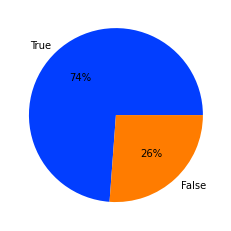

In [60]:
dog_breed = pd.DataFrame(combined_df_v2.p1_dog.value_counts().rename('tweet_count'))

data = dog_breed.tweet_count
labels = dog_breed.index

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:>

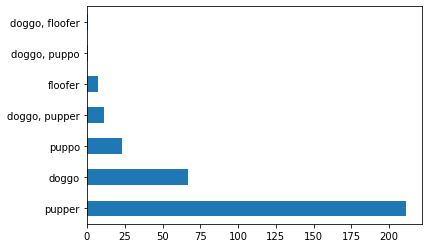

In [61]:
combined_df_v2.dog_stage.value_counts().plot(kind='barh')